### Criação da tabela 1: contém informações sobre as empresas a serem comparadas

*Downloads e fontes:*
- [Índice ico2 b3](https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-sustentabilidade/indice-carbono-eficiente-ico2-composicao-da-carteira.htm): dados das empresas que compõe a carteira do índice ICO2 da B3.
- [Ibovespa - Ações e setores](https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm): dados de todas as empresas que compõe a Ibovespa.

O objetivo de buscar estes dois dados para gerar a primeira tabela é poder criar a coluna binária de particpação do índice e também fazer a comparação setorial.

In [58]:
import pandas as pd

dados_empresas_ico2 = pd.read_csv('../Downloads/carteira_ico2_set-dez_2023.csv', delimiter=';')
codigo_empresas_ico2 = dados_empresas_ico2['Codigo'].apply(lambda x: x + '.SA').to_list()

dados_empresas_ibovespa = pd.read_csv("../Downloads/ibovespa_acoes_setores.csv", delimiter=';')
dados_empresas_ibovespa = dados_empresas_ibovespa[['Codigo', 'Acao', 'Setor']]
dados_empresas_ibovespa['Codigo'] = dados_empresas_ibovespa['Codigo'].apply(lambda x: x + '.SA')
dados_empresas_ibovespa['ico2'] = dados_empresas_ibovespa['Codigo'].apply(lambda x: 1 if x in codigo_empresas_ico2 else 0)
dados_empresas_ibovespa.to_csv("../Database/tabela_1.csv", index=False)
dados_empresas_ibovespa.head()


,Codigo,Acao,Setor,ico2
0,WEGE3.SA,WEG,Bens Indls / Maqs e Equips,1
1,EMBR3.SA,EMBRAER,Bens Indls / Mat Transporte,1
2,AZUL4.SA,AZUL,Bens Indls/Transporte,1
3,CCRO3.SA,CCR SA,Bens Indls/Transporte,1
4,GOLL4.SA,GOL,Bens Indls/Transporte,1


Para selecionar uma quantidade menor de empresas, é feita uma filtragem por setores que compõem e não compõem o índice simultaneamente.

In [59]:
fora_indice = dados_empresas_ibovespa['Setor'].loc[dados_empresas_ibovespa['ico2']== 0 ].unique()
dentro_indice = dados_empresas_ibovespa['Setor'].loc[dados_empresas_ibovespa['ico2']== 1 ].unique()
categorias = []
for categoria in fora_indice:
    if categoria in dentro_indice:
        categorias.append(categoria)

empresas_selecionadas = dados_empresas_ibovespa[dados_empresas_ibovespa['Setor'].isin(categorias)].reset_index()[['Codigo', 'Acao', 'Setor','ico2']]
empresas_selecionadas.head()

,Codigo,Acao,Setor,ico2
0,ASAI3.SA,ASSAI,Cons N Ciclico / Comercio Distr.,1
1,CRFB3.SA,CARREFOUR BR,Cons N Ciclico / Comercio Distr.,0
2,PCAR3.SA,P.ACUCAR-CBD,Cons N Ciclico / Comercio Distr.,1
3,ARZZ3.SA,AREZZO CO,Consumo Ciclico / Comercio,1
4,BHIA3.SA,CASAS BAHIA,Consumo Ciclico / Comercio,1


### Criação da tabela 2

In [60]:
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

acoes_selecionadas = empresas_selecionadas['Codigo']
data_inicio = "2018-01-01"
data_fim = "2023-01-31"

df_acoes_precos = pd.DataFrame(columns=["Codigo", "Data", "Preço"])

for codigo in acoes_selecionadas:
    acao = yf.download(codigo, start=data_inicio, end=data_fim)
    acao.reset_index(inplace=True)
    acao = acao[["Date", "Adj Close"]]
    acao.columns = ["Data", "Preço"]
    acao["Codigo"] = codigo
    df_acoes_precos = pd.concat([df_acoes_precos, acao], ignore_index=True)

df_acoes_precos.to_csv("../Database/tabela_2.csv", index=False)
df_acoes_precos.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Codigo,Data,Preço
0,ASAI3.SA,2021-03-01,13.990469
1,ASAI3.SA,2021-03-02,14.206008
2,ASAI3.SA,2021-03-03,13.970874
3,ASAI3.SA,2021-03-04,14.343170
4,ASAI3.SA,2021-03-05,14.695870


### Criação da Tabela 3

In [34]:
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

acoes_ibovespa = empresas_selecionadas['Codigo'].apply(lambda x: x + '.SA')

data_fim = "2022-12-31"

df_acoes = pd.DataFrame(columns=["Codigo", "Data", "Margem de Lucro"])

for codigo in acoes_ibovespa:
    acao = yf.Ticker(codigo)
    info = acao.info
    data = {
        "Código": codigo,
        "Data": data_fim,
        "Margem de Lucro": info.get("profitMargins", None)
    }
    
    df_acoes = df_acoes.append(data, ignore_index=True)

df_acoes.to_csv("../Database/tabela_3.csv", index=False)
df_acoes.head()

,Código,Data,Margem de Lucro,Receita
0,ASAI3.SA,2022-12-31,0.01503,None
1,CRFB3.SA,2022-12-31,0.00000,None
2,PCAR3.SA,2022-12-31,-0.11210,None
3,ARZZ3.SA,2022-12-31,0.08033,None
4,BHIA3.SA,2022-12-31,-0.03763,None


# Clusterização de empresas

Tabela 1 e Tabela 2

In [61]:
informacoes_agrupadas = pd.merge(df_acoes_precos, empresas_selecionadas[['Codigo', 'Setor', 'ico2']], on='Codigo', how='left')
informacoes_agrupadas.head()

,Codigo,Data,Preço,Setor,ico2
0,ASAI3.SA,2021-03-01,13.990469,Cons N Ciclico / Comercio Distr.,1
1,ASAI3.SA,2021-03-02,14.206008,Cons N Ciclico / Comercio Distr.,1
2,ASAI3.SA,2021-03-03,13.970874,Cons N Ciclico / Comercio Distr.,1
3,ASAI3.SA,2021-03-04,14.343170,Cons N Ciclico / Comercio Distr.,1
4,ASAI3.SA,2021-03-05,14.695870,Cons N Ciclico / Comercio Distr.,1


### Gráficos comparativos das ações das empresas

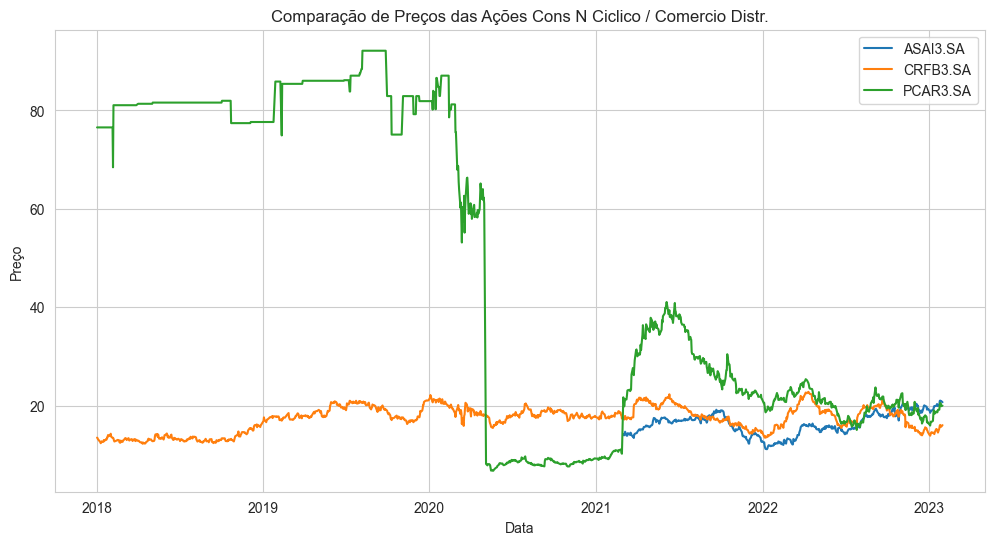

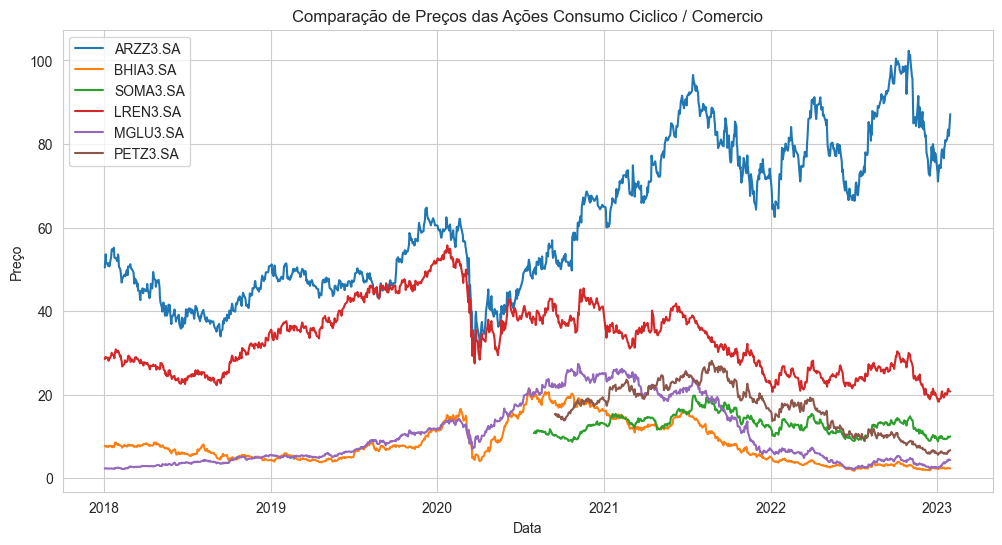

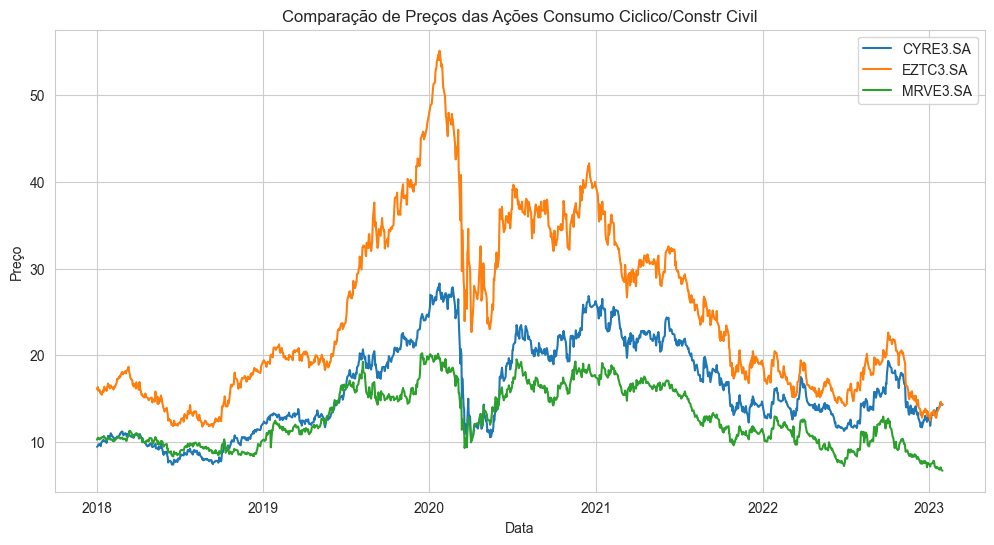

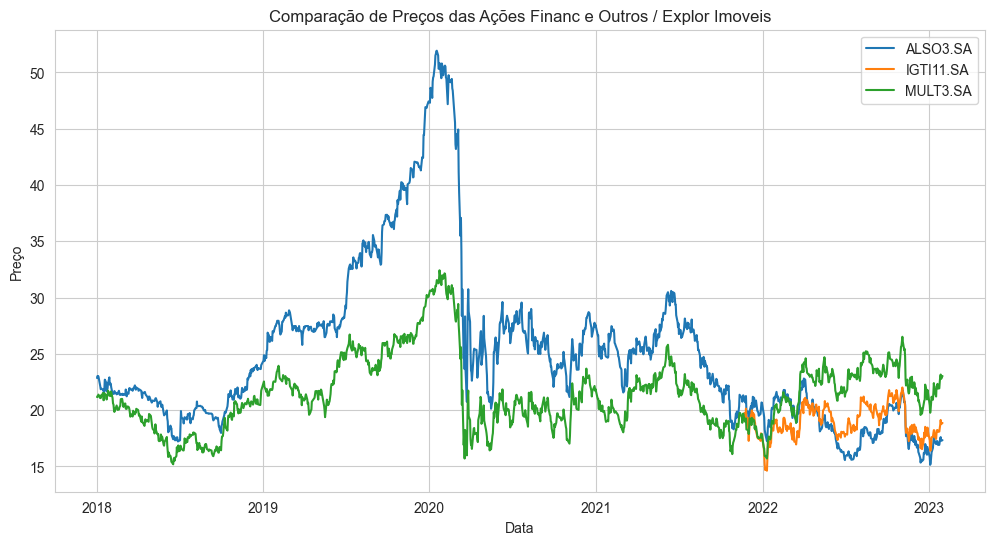

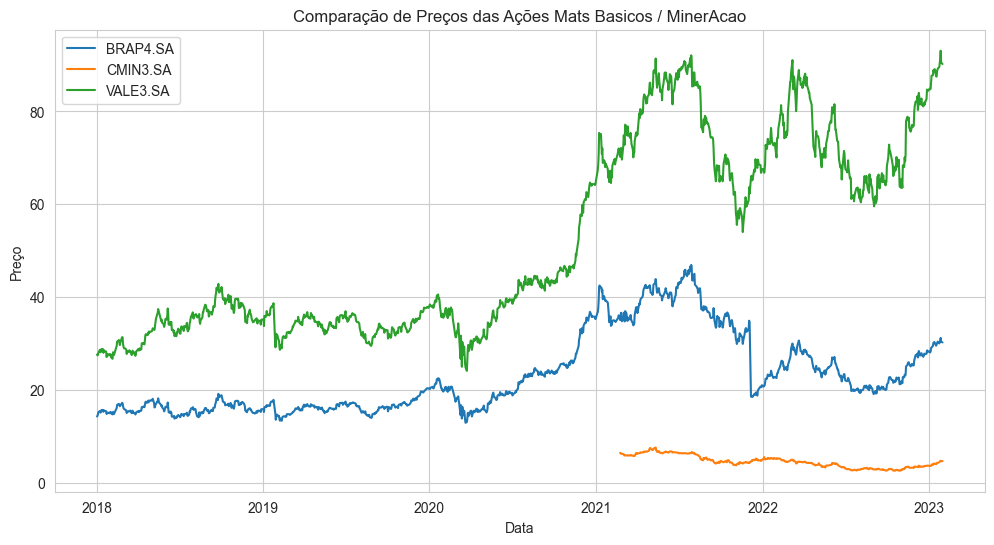

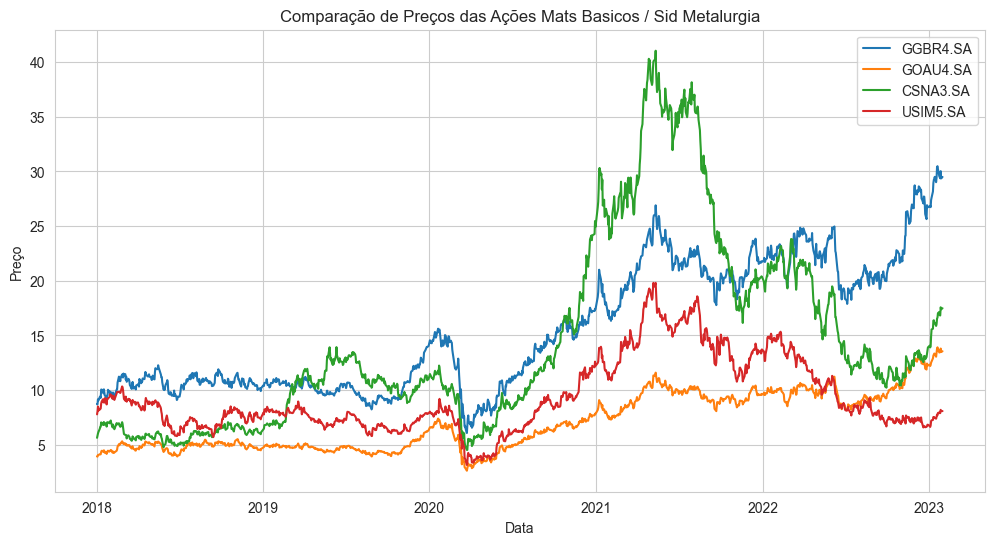

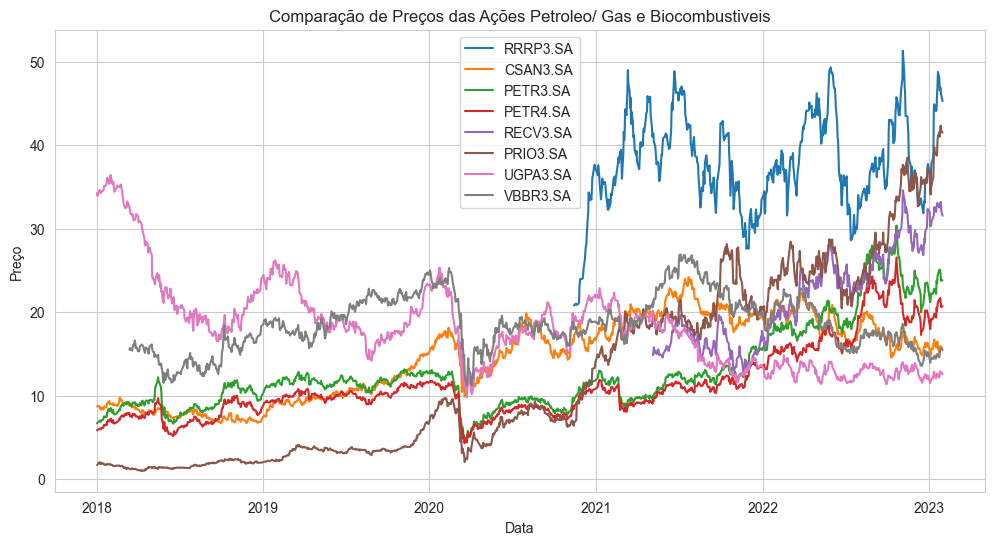

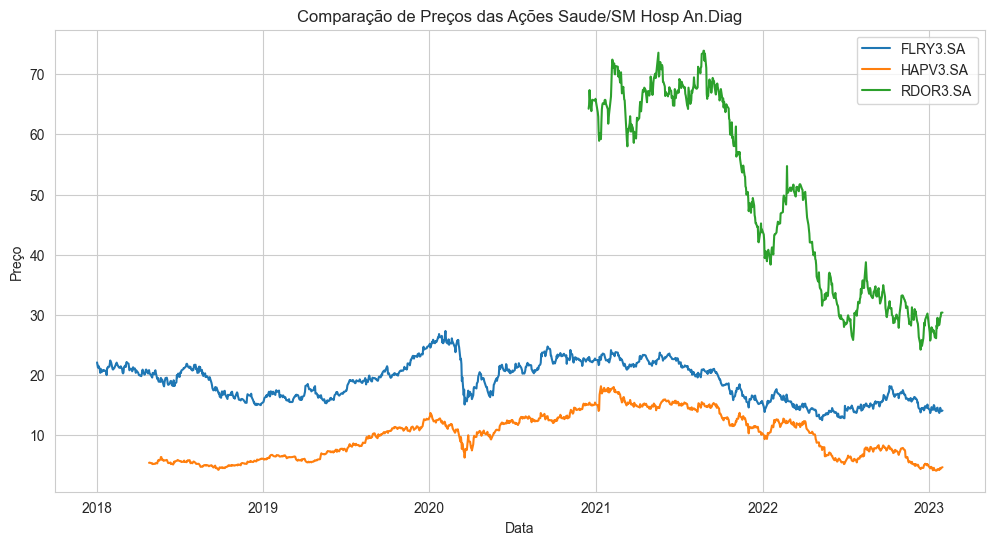

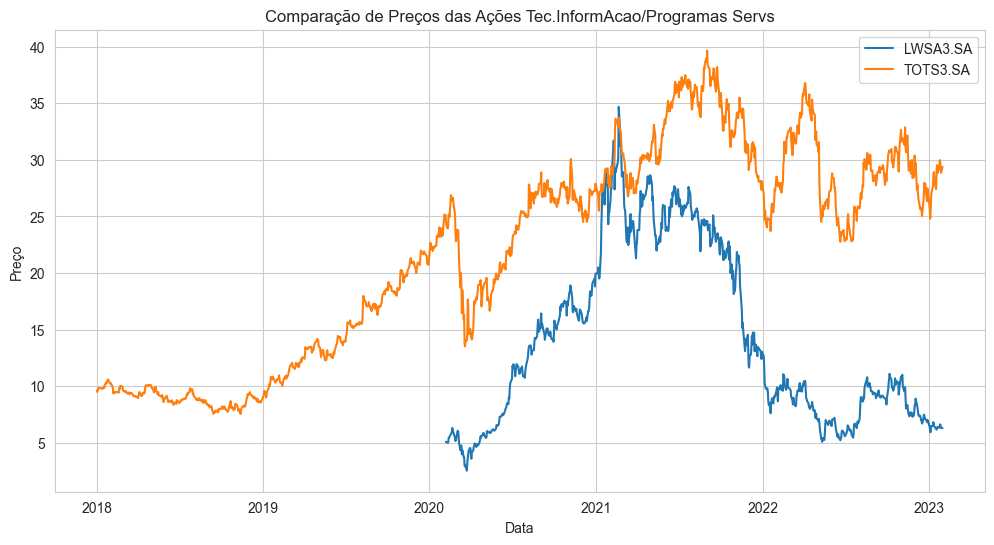

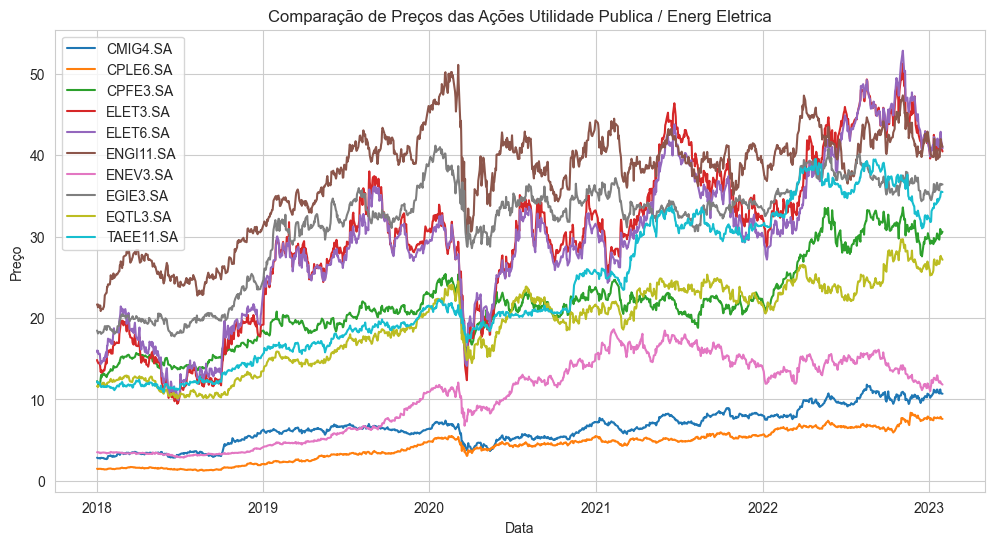

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_comparacao_precos_acoes(dataframe, acoes_para_comparar, setor):
    sns.set_style("whitegrid")

    # Filtrar o DataFrame para as ações escolhidas
    df_acoes = dataframe[dataframe['Codigo'].isin(acoes_para_comparar)]

    # Certifique-se de que a coluna de preço seja do tipo numérico (float)
    df_acoes['Preço'] = df_acoes['Preço'].astype(float)

    # Crie o gráfico de comparação de preços das ações ao longo do tempo
    plt.figure(figsize=(12, 6))
    for acao in acoes_para_comparar:
        df_acao = df_acoes[df_acoes['Codigo'] == acao]
        sns.lineplot(data=df_acao, x='Data', y='Preço', label=acao)
    
    plt.title(f"Comparação de Preços das Ações {setor}")
    plt.xlabel("Data")
    plt.ylabel("Preço")
    plt.legend()
    plt.show()

for setor in informacoes_agrupadas['Setor'].unique():
    df = informacoes_agrupadas.loc[informacoes_agrupadas['Setor'] == setor]
    acoes_para_comparar = df['Codigo'].unique().tolist()
    plot_comparacao_precos_acoes(df, acoes_para_comparar,setor)